In [1]:
import pandas as pd
import os
pd.options.display.max_colwidth = 3000

def texts_to_df(path,rstr):

    file_names = os.listdir(path)
    # Create Dictionary for File Name and Text
    file_name_and_text = {}
    for file in file_names:
        with open(path+ '/' + file, "r", encoding='utf-8') as target_file:
            next(target_file)
            file_name_and_text[file] = target_file.read()

    file_data = (pd.DataFrame.from_dict(file_name_and_text, orient='index').reset_index().rename(index=str, columns={'index': 'file_name', 0: 'content'}))

    lines_list = []
    for file in file_names:
        with open(path+'/' + file, "r", encoding='utf-8') as target_line:

            file_name = target_line.readline()
            file_name = file_name.rstrip('\n')
            file_name = file_name.rstrip(rstr)
        lines_list.append(file_name)
    lines = pd.DataFrame(lines_list)
    lines.columns=['headline']
    lines=lines.reset_index(drop=True,inplace=False)
    file_data = file_data.drop('file_name',axis=1)
    file_data=file_data.reset_index(drop=True,inplace=False)
    final_df = pd.concat([lines,file_data],axis=1)
    final_df=final_df.drop_duplicates(subset='headline',keep='first')
    final_dff=final_df["headline"].str.rstrip("-")
    final_dff=pd.DataFrame(final_dff)
    final_dff.columns=['headlines']
    final_df=pd.concat([final_dff,final_df],axis=1)
    final_df = final_df.drop('headline',axis=1)
    final_df['content'] = final_df['content'].apply(lambda x: ' '.join(x.split(' ')[75:]))
    final_df['content'] = final_df['content'].apply(lambda x: ' '.join(x.split(' ')[:400]))
    return final_df


data=texts_to_df(path='nyt tweets',rstr=' The New York Times')



    


In [2]:
data

,headlines,content
0,How Bad Is Unemployment? ‘Literally Off the Charts’,"the worst devastation since the Great Depression.\nThe Labor Department’s monthly report on Friday provided the clearest picture yet of the breadth and depth of the economic damage — and how swiftly it spread — as the coronavirus pandemic swept the country.\nJob losses have encompassed the entire economy, affecting every major industry. Areas like leisure and hospitality had the biggest losses in April, but even health care shed more than a million jobs. Low-wage workers, including many women and members of racial and ethnic minorities, have been hit especially hard.\n“It’s literally off the charts,” said Michelle Meyer, head of U.S. economics at Bank of America. “What would typically take months or quarters to play out in a recession happened in a matter of weeks this time.”\nUnemployment rate\nSource: Department of Labor\nFrom almost any vantage point, it was a bleak report. The share of the adult population with a job, at 51.3 percent, was the lowest on record. Nearly 11 million people reported working part time because they couldn’t find full-time work, up from about four million before the pandemic.\nIf anything, the numbers probably understate the economic distress.\nMillions more Americans have filed unemployment claims since the data was collected in mid-April. What’s more, because of issues with the way workers are classified, the Labor Department said the actual unemployment rate last month might have been closer to 20 percent.\nIt remains possible that the recovery, too, will be swift, and that as the pandemic retreats, businesses that were fundamentally healthy before the virus will reopen, rehire and return more or less to normal. The one bright spot in Friday’s report was that nearly 80 percent of the unemployed said they had been temporarily laid off and expected to return to their jobs in the coming months.\nShare of unemployed on temporary layoffs\nSource: Department of Labor\nPresident Trump endorsed this view in an interview Friday morning on Fox News. “Those jobs will all be back, and they’ll be back very soon,” Mr. Trump said, “and next year we’re going to have a phenomenal year.”\nBut Diane Swonk, chief economist at Grant Thornton, said that such optimism was misplaced, and that many of the jobs could not be recovered.\n“This is going to be a hard reality,” Ms. Swonk said. “These furloughs are permanent, not temporary.”\nMany businesses have indicated that employees can work from home throughout the summer, hurting sales at downtown restaurants. Meetings and conferences have been put off"
1,The Disastrous Employment Numbers Show Almost Every Job Is at Risk,"8, 2020Updated May 9, 2020, 12:19 p.m. ETListen to This ArticleAudio Recording by AudmTo hear more audio stories from publishers like The New York Times, download Audm for iPhone or Android.The jobs numbers were the catastrophe everybody was expecting.April 2020 — more technically, the period between the second week of March and the second week of April — was the worst month for American workers at least since the Great Depression and possibly in the history of the nation.That isn’t really a surprise, but one aspect of the latest employment report does help crystallize the nature of what the United States is grappling with. In a set of tables in the final pages of the jobs numbers, the Bureau of Labor Statistics reports the number of jobs gained or lost in each industry, broken down in a fairly fine-grained way.Across dozens and dozens of industries, only one added a meaningful number of jobs in April: general merchandise stores, including warehouse clubs and supercenters. They increased their payrolls by 93,400 positions.That makes sense given Americans need to buy groceries and other at-home staples, and Walmart has said publicly that it is hiring on a large scale to meet demand.There were a few other sectors with very narrowly positive numbers, including manufacturers of compu

In [3]:
import numpy as np  
import pandas as pd 
import re           

from nltk.corpus import stopwords   
import warnings
# from bs4 import BeautifulSoup
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore")

In [4]:
data.reset_index(drop=True,inplace=True)

In [5]:
contraction_mapping = {"’":"'","ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",

                           "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",

                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",

                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",

                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",

                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",

                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",

                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",

                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",

                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",

                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",

                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",

                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",

                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",

                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",

                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",

                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",

                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",

                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",

                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",

                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",

                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",

                           "you're": "you are", "you've": "you have"}

In [6]:
stop_words = set(stopwords.words('english')) 
def text_cleaner(text):
    newString = text.lower()
    newString = re.sub(r'\([^)]*\)', '', newString)
    newString = re.sub('"','', newString)
    newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])    
    newString = re.sub(r"'s\b","",newString)
    newString = re.sub("[^a-zA-Z.]", " ", newString) 
    tokens = [w for w in newString.split() if not w in stop_words]
    long_words=[]
    for i in tokens:
        if len(i)>=3:                  #removing short word
            long_words.append(i)   
    return (" ".join(long_words)).strip()

cleaned_text = []
for t in data['content']:
    cleaned_text.append(text_cleaner(t))
    
cleaned_text    

['worst devastation since great depression. labor department monthly report friday provided clearest picture yet breadth depth economic damage swiftly spread coronavirus pandemic swept country. job losses encompassed entire economy affecting every major industry. areas like leisure hospitality biggest losses april even health care shed million jobs. low wage workers including many women members racial ethnic minorities hit especially hard. literally charts said michelle meyer head u.s. economics bank america. would typically take months quarters play recession happened matter weeks time. unemployment rate source department labor almost vantage point bleak report. share adult population job percent lowest record. nearly million people reported working part time find full time work four million pandemic. anything numbers probably understate economic distress. millions americans filed unemployment claims since data collected mid april. issues way workers classified labor department said a

In [7]:
def summary_cleaner(text):
    newString = re.sub('"','', text)
    newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])    
    newString = re.sub(r"'s\b","",newString)
    newString = re.sub("[^a-zA-Z]", " ", newString)
    newString = newString.lower()
    tokens=newString.split()
    newString=''
    for i in tokens:
        if len(i)>1:                                 
            newString=newString+i+' '  
    return newString


#Call the above function
cleaned_summary = []
for t in data['headlines']:
    cleaned_summary.append(summary_cleaner(t))

data['content']=cleaned_text
data['headlines']=cleaned_summary
data['headlines'].replace('', np.nan, inplace=True)
data.dropna(axis=0,inplace=True)

In [8]:
data.replace('', np.nan, inplace=True)
data.dropna(axis=0,inplace=True)

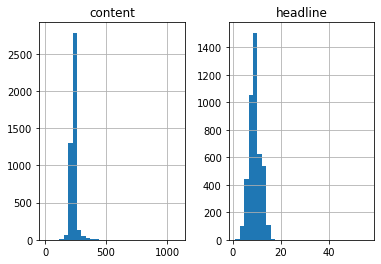

In [9]:
import matplotlib.pyplot as plt
text_word_count = []
summary_word_count = []

# populate the lists with sentence lengths
for i in data['content']:
      text_word_count.append(len(i.split()))

for i in data['headlines']:
      summary_word_count.append(len(i.split()))

length_df = pd.DataFrame({'headline':summary_word_count, 'content':text_word_count})
length_df.hist(bins = 30)
plt.show()

In [10]:
cnt=0
for i in data['headlines']:
    if(len(i.split())<=15):
        cnt=cnt+1
print(cnt/len(data['headlines']))

0.9968065693430657


In [11]:
max_text_len=200
max_summary_len=15

In [12]:
cleaned_text =np.array(data['content'])
cleaned_summary=np.array(data['headlines'])

short_text=[]
short_summary=[]

for i in range(len(cleaned_text)):
    if(len(cleaned_summary[i].split())<=max_summary_len and len(cleaned_text[i].split())<=max_text_len):
        short_text.append(cleaned_text[i])
        short_summary.append(cleaned_summary[i])
        
df=pd.DataFrame({'content':short_text,'headlines':short_summary})

In [13]:
df

,content,headlines
0,person year three year year honor mother day decided look whole messy glorious complicated story identity motherhood. motherhood changes motherhood changed my... portraits single moms choice brain...,motherhood changes us all
1,updated may n.h.l. wednesday condemned misogynistic comments made washington capitals forward brendan leipsic florida panthers prospect jack rodewald group chat social media.their comments include...,condemns misogynistic remarks by players on social media
2,espa videocreditthere clinical list covid symptoms includes dry cough fever shortness breath. disease actually feels. like lengthy hangover. anvil chest. alien takeover. like fight mike tyson.more...,what it like to have coronavirus
3,updated may hard believe write two months ago allowed roam free could board planes alight wander rental cars check hotels could chase replenish beauty wonder cells need survive went los angeles as...,what happened to val kilmer he just starting to figure it out
4,coronavirus starting rise. poonam. hi. nice meet you. contractions minutes apart. get pulled o.r. cornell section. like minute going come pull door. gloved masked up. husband suited up. literally ...,giving birth in the middle of the coronavirus pandemic
...,...,...
194,timesby gia kourlaspublished feb. updated feb. one morning last spring tiler peck woke tiler peck. recognize herself. afraid use eyeballs look much pain said.on april keeping journal diagnosed sev...,ballerina nightmare am more than just dancer
195,new york timesby elizabeth harrisfeb. line sciamma wants see equality sexy.in drama portrait lady fire watch two women century france fall love. film getting wider american release beginning valen...,how portrait of lady on fire sees power in two women in love
196,open mind racing. two months since quit job entry level software engineer uber tried forget experienced witnessed impossible.in year company propositioned company chat new manager first day team r...,opinion susan fowler why wrote the uber memo
197,starry high budget run editor chief vanity fair new yorker. like many journalists brown pivoted recent years adjacent line work case live event business. women world summit hosted speakers like op...,tina brown on the future of the royal family


In [14]:
from summarizer import Summarizer


In [24]:
sentences2 = df['content'].values.tolist()[0:1]
sentences2

['person year three year year honor mother day decided look whole messy glorious complicated story identity motherhood. motherhood changes motherhood changed my... portraits single moms choice brain motherhood child name erase identity impersonating motherhood mothers martyrs becoming new mom old depression darker daughter. matters. name becomes mom short essays becoming mother changed way look relationships ambitions well failure body image written amber tamblyn casey wilson nikole hannah jones angela garbes robin tunney jennifer weiner several others. piece jenni gritters motherhood rewires brain another pooja lakshmin m.d. perinatal psychiatrist lose become parent. coronavirus pandemic hard know people barriers public maternal selves collapsed ways never considered. one thing take away stories identity mother fixed likely change ways surprise maybe even delight children grow. illustration wesley allsbrook.advertisementsite indexsite information navigation new york times companynytco

In [29]:
summaries_list=[]
for item in sentences2:
    model = Summarizer()
    result = model(item,min_length=60)
    final = ''.join(result)
    summaries_list.append(final)

In [30]:
summaries_list

['person year three year year honor mother day decided look whole messy glorious complicated story identity motherhood. motherhood changes motherhood changed my... portraits single moms choice brain motherhood child name erase identity impersonating motherhood mothers martyrs becoming new mom old depression darker daughter.']

In [31]:

sentences1= df['headlines'].values.tolist()[0:1]
sentences1

['motherhood changes us all ']

In [32]:
def cosine_distance_countvectorizer_method(s1, s2):
    
    # sentences to list
    allsentences = [s1 , s2]
    
    # packages
    from sklearn.feature_extraction.text import CountVectorizer
    from scipy.spatial import distance
    
    # text to vector
    vectorizer = CountVectorizer()
    all_sentences_to_vector = vectorizer.fit_transform(allsentences)
    text_to_vector_v1 = all_sentences_to_vector.toarray()[0].tolist()
    text_to_vector_v2 = all_sentences_to_vector.toarray()[1].tolist()
    
    # distance of similarity
    cosine = distance.cosine(text_to_vector_v1, text_to_vector_v2)
    print('Score of'+ " '" + s1 + "'"+' is',round((1-cosine)*100,2),'%')
    return cosine

In [33]:
results=[]

for s1,s2 in zip(sentences1,sentences2):

    result = cosine_distance_countvectorizer_method(s1, s2)
    results.append(result)
    

Score of 'motherhood changes us all ' is 24.57 %


In [34]:
import re
from nltk.corpus import stopwords
import pandas as pd

gloveFile = "glove.6B.100d.txt"
import numpy as np
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    with open(gloveFile, encoding="utf8" ) as f:
        content = f.readlines()
    model = {}
    for line in content:
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model


def preprocess(raw_text):

    # keep only words
    letters_only_text = re.sub("[^a-zA-Z]", " ", raw_text)

    # convert to lower case and split 
    words = letters_only_text.lower().split()

    # remove stopwords
    stopword_set = set(stopwords.words("english"))
    cleaned_words = list(set([w for w in words if w not in stopword_set]))

    return cleaned_words

def cosine_distance_between_two_words(word1, word2):
    import scipy
    return (1- scipy.spatial.distance.cosine(model[word1], model[word2]))

def calculate_heat_matrix_for_two_sentences(s1,s2):
    s1 = preprocess(s1)
    s2 = preprocess(s2)
    result_list = [[cosine_distance_between_two_words(word1, word2) for word2 in s2] for word1 in s1]
    result_df = pd.DataFrame(result_list)
    result_df.columns = s2
    result_df.index = s1
    return result_df

def cosine_distance_wordembedding_method(s1, s2):
    import scipy
    vector_1 = np.mean([model[word] for word in preprocess(s1)],axis=0)
    vector_2 = np.mean([model[word] for word in preprocess(s2)],axis=0)
    cosine = scipy.spatial.distance.cosine(vector_1, vector_2)
    print('Glove Embeddings with a cosine distance asses that our two phrases are similar to',round((1-cosine)*100,2),'%')

def heat_map_matrix_between_two_sentences(s1,s2):
    df = calculate_heat_matrix_for_two_sentences(s1,s2)
    import seaborn as sns
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(figsize=(8,8)) 
    ax_blue = sns.heatmap(df, cmap="YlGnBu")
    # ax_red = sns.heatmap(df)
    print(cosine_distance_wordembedding_method(s1, s2))
    return ax_blue

In [35]:
model = loadGloveModel(gloveFile)


Loading Glove Model
Done. 400000  words loaded!


Glove Embeddings with a cosine distance asses that our two phrases are similar to 79.42 %
None


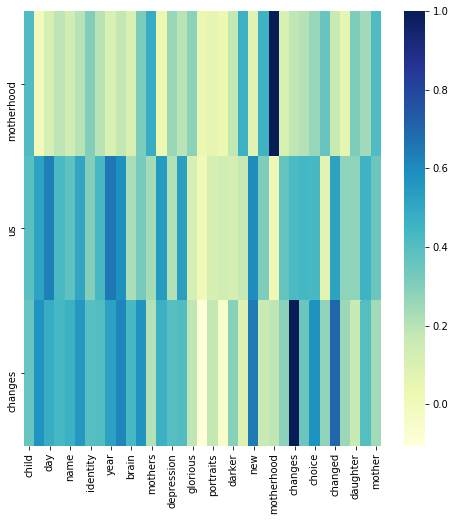

In [36]:
maps=[]

for s1,s2 in zip(sentences1,summaries_list):

    map_ = heat_map_matrix_between_two_sentences(s1,s2)
         
    figure = map_.get_figure()    
    figure.savefig('svm_conf100d2.png', dpi=300,bbox_inches="tight")



